# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


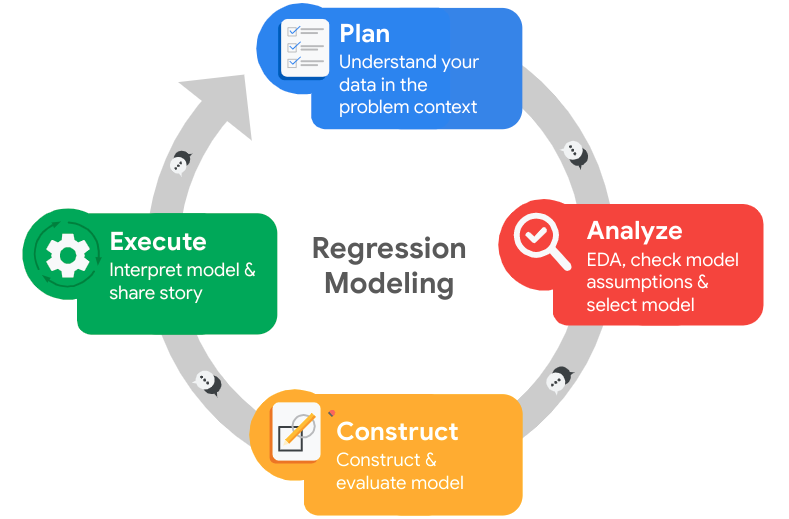

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1) Primary stakeholders - would include the people who are directly affected by this model. So this includes the employees, the management and the HR department of the company
Secondary stakeholders - are those that are indirectly affected by the model. So this includes the competition and their employees, as they may consider investing into something similar on their end

2) Trying to find the relationship between employee turnover and factors within the control of the management
Trying to build a model that can successfully predict whether an employee is going to leave or not - this helps us to better understand flight risks, giving us more time to provide strategies to deal with them.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
data = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
data.describe(include = "all")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
data.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
data = data.rename(columns = {"average_montly_hours" : "average_monthly_hours",
             "time_spend_company" : "tenure",
             "Work_accident" : "work_accident",
              "Department":"department"})


# Display all column names after the update
data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
data.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
dupli = data[data.duplicated()]


In [11]:
dupli.sort_values(["satisfaction_level","last_evaluation"]).head(15)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12397,0.09,0.79,6,293,5,0,1,0,sales,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
data = data.drop_duplicates(keep = "first")


data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

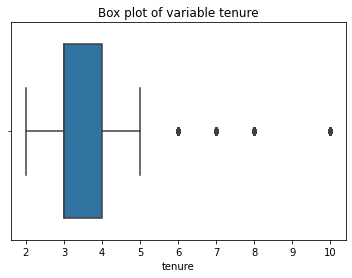

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
import seaborn as sns
sns.boxplot(data["tenure"])
plt.title("Box plot of variable tenure")
plt.xlabel("tenure")

plt.show()

In [14]:
# Determine the number of rows containing outliers
tenure_data = pd.DataFrame(data["tenure"])

mean_tenure , std_tenure = tenure_data.tenure.mean() , tenure_data.tenure.std()

In [15]:
print(mean_tenure , std_tenure)

3.3648569760653824 1.3302395179523288


In [44]:
upper_limit = (mean_tenure + 3 * std_tenure)
lower_limit = (mean_tenure - 3 * std_tenure)

In [16]:
tenure_data

,tenure
0,3
1,6
2,4
3,5
4,3
...,...
11995,10
11996,10
11997,10
11998,10


In [17]:
outliers = tenure_data[(tenure_data["tenure"] > (mean_tenure + 3 * std_tenure)) | 
                       (tenure_data["tenure"] < (mean_tenure - 3 * std_tenure))]

In [18]:
(mean_tenure - 3 * std_tenure)

-0.6258615777916039

In [19]:
outliers.shape

(188, 1)

In [20]:
# so we have 188 outliers in total out of a dataset of size 15,000

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




To be seen

Most of the distributions follow a normal distribution

Get a feel for the data and possible relationships, also helps when choosing which features to keep and which features reo remove

Just the past labs

Absolutely, at every point of our data preprocessing stage, we should ensure that the data is ethical, for example, we would not want to discriminate someone just based on a particular variable.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [21]:
data.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [22]:
# Get numbers of people who left vs. stayed
stayed = data.left.value_counts().iloc[0]
left = data.left.value_counts().iloc[1]

# Get percentages of people who left vs. stayed
left_percent = left / (left + stayed) * 100
stay_percent = 100 - left_percent


In [23]:
left_percent

16.604119756484028

In [24]:
left

1991

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [25]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

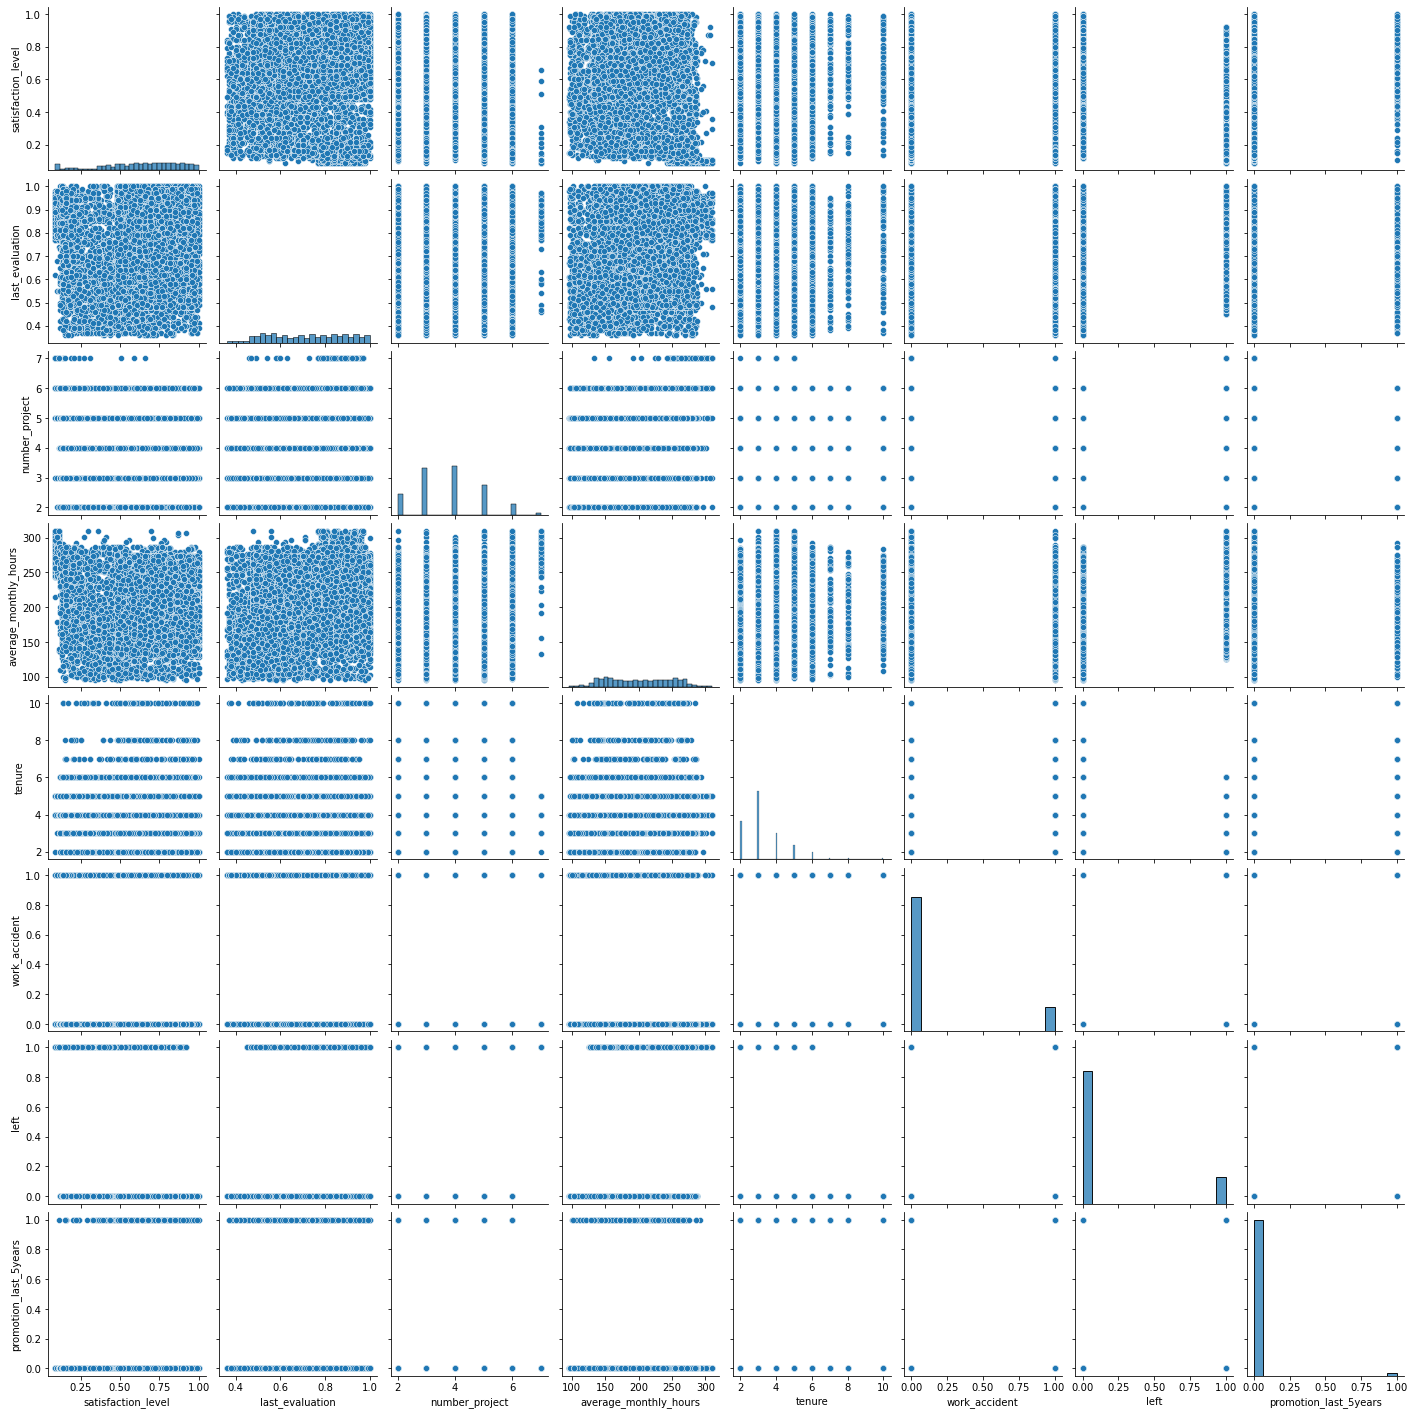

In [26]:
# Create a plot as needed
sns.pairplot(data)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

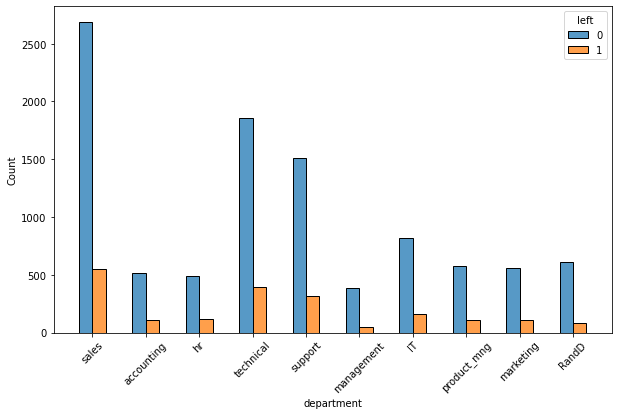

In [27]:
# Create a plot as needed
# study the relation between work accident and left
plt.figure(figsize = (10,6))
sns.histplot(data=data, x='department', hue='left', multiple='dodge', shrink=.5)
plt.xticks(rotation='45')

In [28]:
# so there doesnt seem to be much of a relationship between people having a work accident and them leaving
# so this would not be a feature used in the model

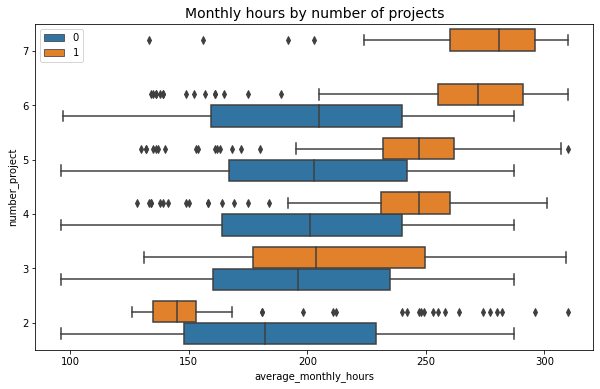

In [29]:
# Create a plot as needed
plt.figure(figsize = (10,6))
g = sns.boxplot(data=data, x='average_monthly_hours', y='number_project', hue='left', orient="h")
g.invert_yaxis()
g.set_title('Monthly hours by number of projects', fontsize='14')

g.legend()

In [30]:
# so we notice that at each num_project, its the employees at the higher end of number of hours worked that ended up leaving
# also all employess that had 7 projects left
# could indicate that 7 projects proved to be too much

# also notice that there are two groups of people
# group a is people who were working way too less and would have been fired
# group b are people who have been working way too much and we can infer that they would have left instead of being fired
# since they would have been contributing so much to the projects

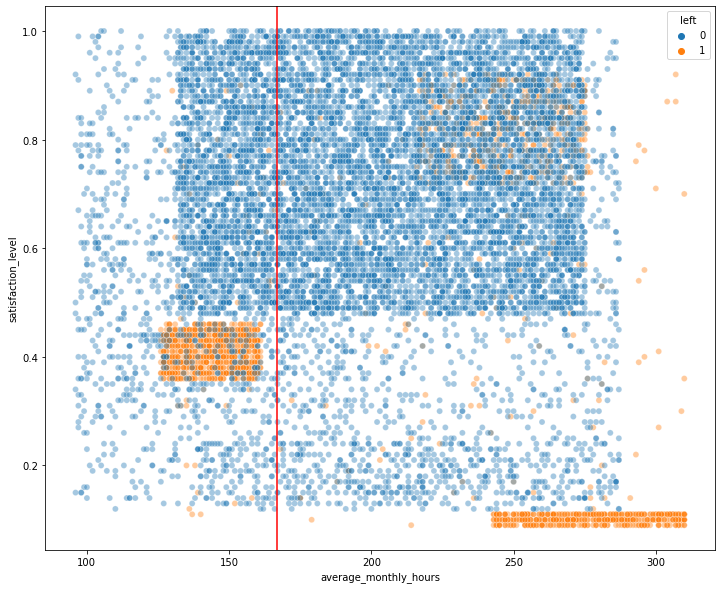

In [31]:
# Create a plot as needed
# now a normal work weekend should consist of 166.67 hrs./mo.
# we can plot the distribution of hours worked and satisfaction level to study their relation
plt.figure(figsize = (12,10))
sns.scatterplot(data = data , x = "average_monthly_hours" , y= "satisfaction_level" , hue = "left" , alpha = 0.4)
plt.axvline(166.67,color = 'r')

In [32]:
# so we can see that the majority of the employees are being overworkd
# in the bottom right we see the group B people who have been working too much and have very low satisfaction levels
# in the left we can see the group A who would have been fired
# but the group in the top right corner have high satisfaction levels even though they have very high monthly work hours.
# this is a little strange

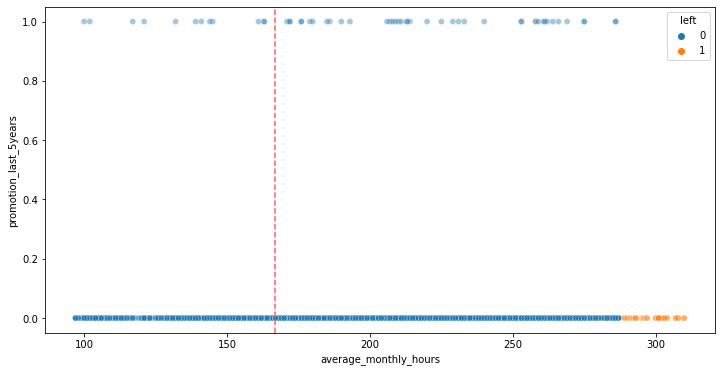

In [33]:
# Create a plot as needed
plt.figure(figsize = (12,6))
data_sub = data[data["tenure"] >= 5]
sns.scatterplot(data=data_sub , x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')


In [34]:
# this could mean
# most of the employees who got the promotion didnt leave
# most of the high performing employees did not get a promotion
# that could be a reason for them leaving

### Insights

So we observe that
1) the employees are in general very overworked
2) there seems to be a drop in satisfaction levels from people just entering their 4th year with company - so could research onto any policies that are relevant to year 4 employees
3) most employees who leave could be leaving due to lack of growth in the company - this could be due to favoritism of some kind
4) In terms of salary levels, there seems to be a drop from year 4 onwards with a recovery in year 6 onwards
5) there does not seem to be a relation to getting a work accident and people leaving, so it may be a far less impactful variable

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [35]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The task is a binary classification task.
The target variable is whether the employee left the company or not.

### Identify the types of models most appropriate for this task.

We have a few options we can consider-

1) Simple Logistics Regression

2) Naive Bayes Classifier

3) K means cluserting with k = 2.

4) Tree based techniques

### Modeling

Add as many cells as you need to conduct the modeling process.

We first try the logistic regression approach.

In [36]:
### YOUR CODE HERE ###
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [39]:
data['salary'] = data['salary'].map({"high": 3, "medium": 2, "low": 1}) 


In [41]:
data_enc = pd.get_dummies(data,drop_first = False)

In [42]:
data_enc

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,3,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,3,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,3,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,3,0,0,0,0,0,1,0,0,0,0


In [43]:
data_enc.shape

(11991, 19)

In [45]:
data_subset = data_enc[(data_enc["tenure"] >= lower_limit) & (data_enc["tenure"] <= upper_limit)]

In [46]:
data_subset.shape

(11803, 19)

In [50]:
X = data_subset.drop("left",axis = 1)
y = data_subset.left

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,stratify = y,random_state = 42)

In [52]:
clf = LogisticRegression(random_state = 42,max_iter = 500).fit(X_train,y_train)


In [54]:
y_pred = clf.predict(X_test)

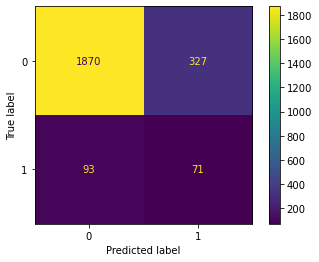

In [58]:
log_cm = confusion_matrix(y_pred,y_test,labels = clf.classes_)

disp = ConfusionMatrixDisplay(log_cm,display_labels = clf.classes_)

disp.plot(values_format='')
plt.show()

In [62]:
print(classification_report(y_test, y_pred, target_names=["Predicted to stay","Predicted to leave"]))

                    precision    recall  f1-score   support

 Predicted to stay       0.85      0.95      0.90      1963
Predicted to leave       0.43      0.18      0.25       398

          accuracy                           0.82      2361
         macro avg       0.64      0.57      0.58      2361
      weighted avg       0.78      0.82      0.79      2361



In [65]:
# not try to do it with a tree based approach


In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 0)

In [67]:
def is_overworked(row):
    return row > 175

data["overworked"] = data["average_monthly_hours"].apply(is_overworked)

In [68]:
data = data.drop("average_monthly_hours",axis = 1)

In [74]:
X.shape

(11803, 18)

In [70]:
# now we try with a random forest ensemble

In [80]:
rf = RandomForestClassifier(random_state = 0)

cv_param = {"max_depth" : [5,7,None]
           ,"min_samples_leaf" : [1,2,3]
           ,"min_samples_split" : [2,3,4]
           ,"max_features" : [1.0]
           ,"n_estimators" : [75,150,200],}

rf_clf = GridSearchCV(rf,cv_param , scoring = {"accuracy","f1","recall","precision"},cv = 5,refit = "recall")
# rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [81]:
rf_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [82]:
rf_clf.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [83]:
rf_clf.best_score_

0.9095755426365291

In [84]:
tuned_forest = rf_clf.best_estimator_

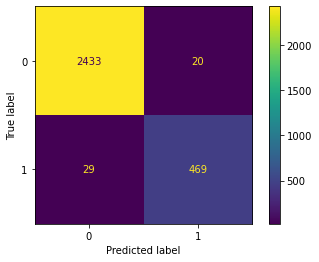

In [87]:
preds = tuned_forest.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tuned_forest.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tuned_forest.classes_)
disp.plot(values_format='');

In [91]:
cv_results = pd.DataFrame(rf_clf.cv_results_)

In [95]:
best_estimator_results = cv_results.iloc[cv_results["mean_test_recall"].idxmax(), :]

# Extract Accuracy, precision, recall, and f1 score from that row
f1 = best_estimator_results.mean_test_f1
recall = best_estimator_results.mean_test_recall
precision = best_estimator_results.mean_test_precision
accuracy = best_estimator_results.mean_test_accuracy

result_df = pd.DataFrame([["Random Forest",f1,recall,precision,accuracy]] , columns = ["model name","f1","recall","precision","accuracy"])


In [96]:
result_df

,model name,f1,recall,precision,accuracy
0,Random Forest,0.931683,0.909576,0.954992,0.977519


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Would want to go for random forest model with the feature engineered.
It provides by far the best metric values.
Other things to look into are-
1) Try to reduce workload
2) Make it clear that working the required is enough and any amount more than that will not be factored into promotion
3) Because otherwise people will just keep pushing each other to work more and more hours
4) Leading to employees becoming more overworked with lower satisfaction levels
5) These two work together to cause people to leave the company